In [1]:
# Import relevant libraries

import numpy as np
import seaborn as sns
import pandas as pd
import missingno
import matplotlib.pyplot as plt
%matplotlib inline



## Overall goal of this EDA

The major goal is to understand how different features affect the survival status of a patient.
It is to determine which feature/ features influence the survival status of the patient the most?


## Initial Investigations

Lets begin by understanding the dataset, its structure, shape and general information about the data before we can perform our anaylsis. In this stage, we are also going to check for missing values and perform some data imputation if needed. It is imperative that we handle missing or inconsistent data points before we can begin with our Anaylsis.

In [2]:
# Read data

haberman_df = pd.read_csv("haberman.csv")
haberman_df.head()

,30,64,1,1.1
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


In [3]:
# Rename the columns of the dataframe

haber_df = haberman_df.rename(columns={
    "30":"Age",
    "64":'Operation Year',
    "1":'Axillary Nodes',
    "1.1":"Survival Status"
})

haber_df.head()

,Age,Operation Year,Axillary Nodes,Survival Status
0,30,62,3,1
1,30,65,0,1
2,31,59,2,1
3,31,65,4,1
4,33,58,10,1


The renaming of columns makes it easier for us to understand what each columns actually mean and the kind of data points they hold. 

In [4]:
# shape of the dataset

haber_df.shape

(305, 4)

From the above we can come to a conclusion that the dataset has 305 rows or observations and 4 columns. In simpler terms, this means that we have 305 patients and 4 features to help us understand the survival status of a patient. 305 patients may not be enough of a sample to perform our anaylsis in order to arrive at conclusive insights.

In [5]:
haber_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 305 entries, 0 to 304
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              305 non-null    int64
 1   Operation Year   305 non-null    int64
 2   Axillary Nodes   305 non-null    int64
 3   Survival Status  305 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


All of our data points are integers, hence there is no need for us to do some casting on Age, Operation and Axillary nodes.However, since we are just performing an EDA, we might want to change our survival status to a categorical features.We may convert this feature to a number data types later on , since some of the visualisations need numerical data.

In [6]:
haber_df['Survival Status'] = haber_df['Survival Status'].map({
    1:"Yes",
    2:"No"
})

haber_df.head(5)

,Age,Operation Year,Axillary Nodes,Survival Status
0,30,62,3,Yes
1,30,65,0,Yes
2,31,59,2,Yes
3,31,65,4,Yes
4,33,58,10,Yes


In [7]:
# Check dtype

haber_df['Survival Status'].dtype

dtype('O')

Age                0
Operation Year     0
Axillary Nodes     0
Survival Status    0
dtype: int64


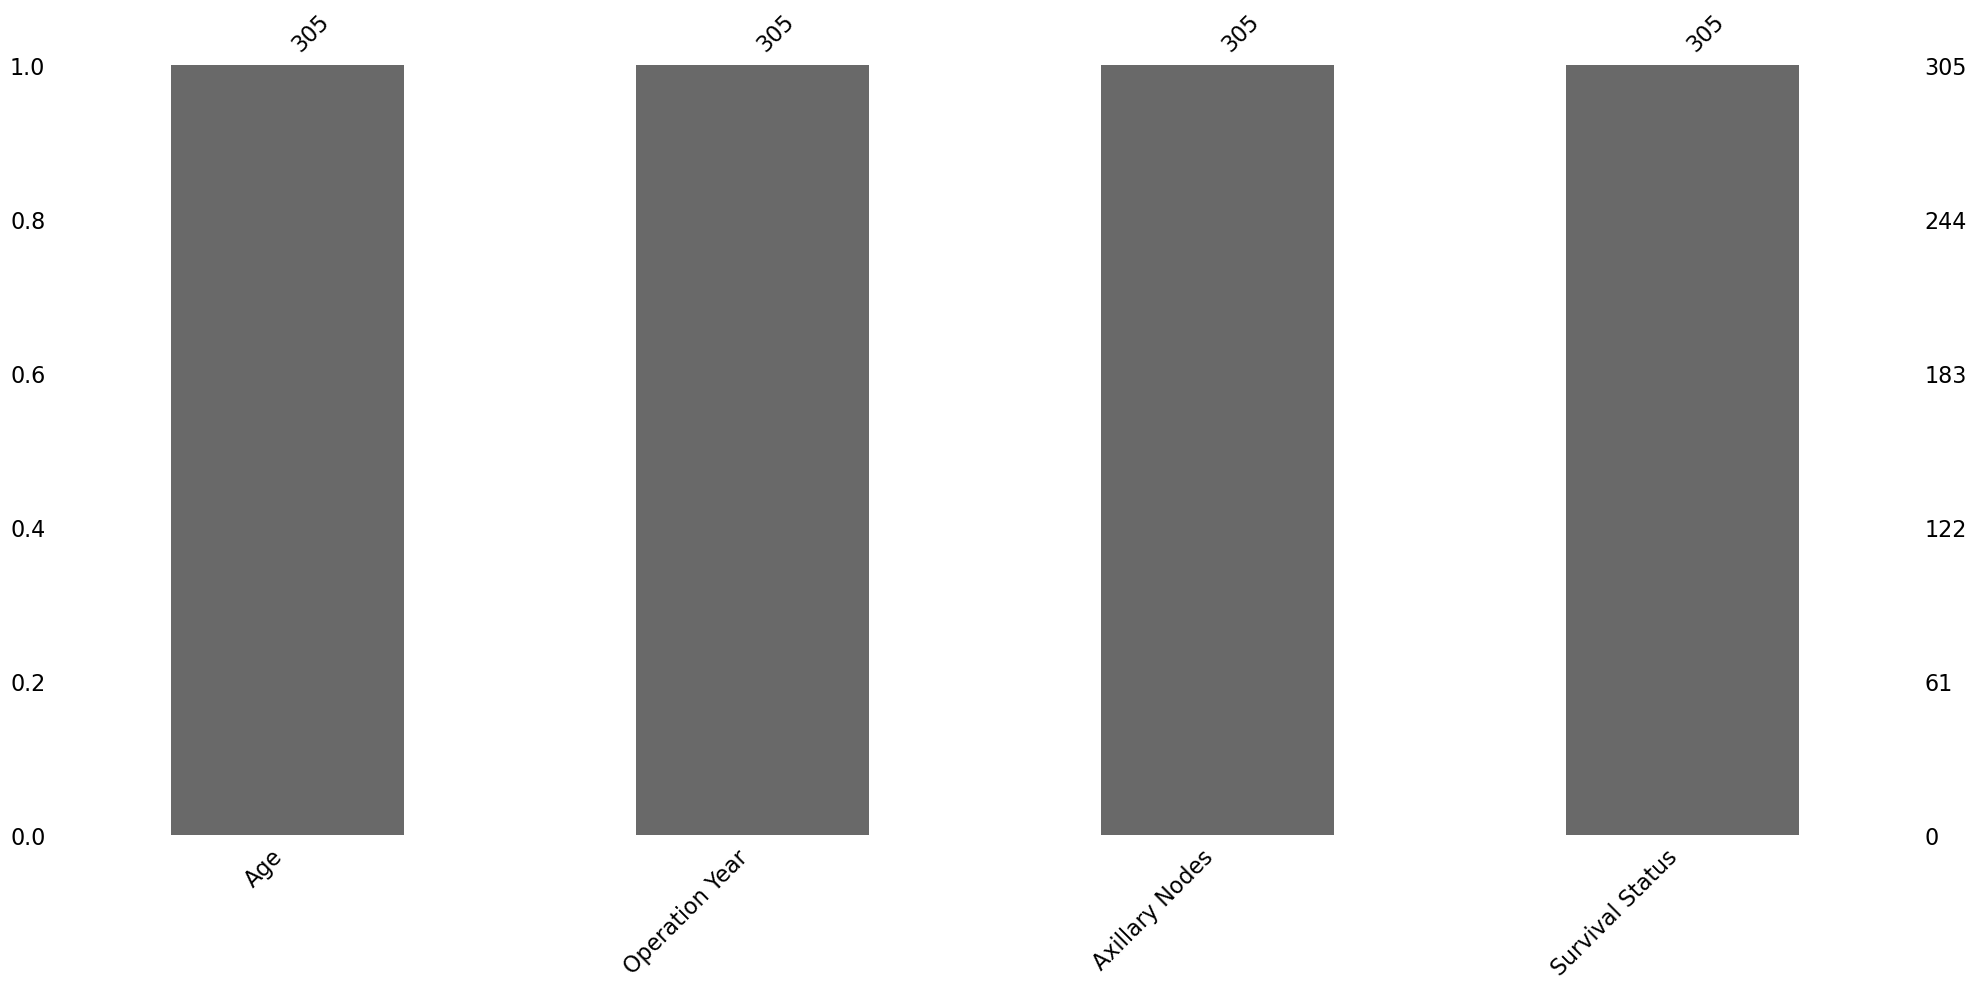

In [8]:
# Print and view missing values if there is any

print(haber_df.isnull().sum())

missingno.bar(haber_df);

From what we can gather from the above visualisation, there are no missing data points in this dataset, hence there is no need for us to perform some data imputation or handle missing data.

In [9]:
# Statistical summary of the data

haber_df.describe()

,Age,Operation Year,Axillary Nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


From the 304 patients in our dataset, the average age of our patients is 52 years.
The youngest patient who went through the surgery is 30 years while the eldest patient is 83 years old.

25% of the patients are less than 44 years old,
50% are less than 52 years which entails that the mean and the median is round about 52 years as well.
75 are less than 61 years, while over 25% are older than 61 years of age.

50% of the patients were operated prior to 1963, while the rest of the patients after 1963.


# Univariate Anaylsis

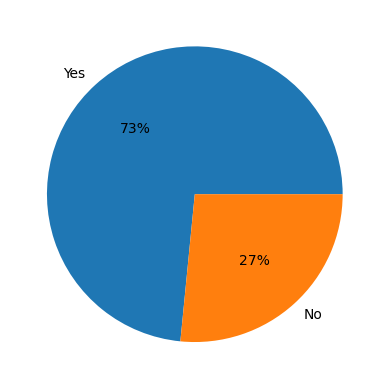

In [10]:

pie_df = haber_df["Survival Status"].value_counts()
plt.pie(pie_df,labels=pie_df.index, autopct="%.0f%%");

From the above graph, we understand that there 73% of the patients survived for 5 years or longer, while 27% of the patients died within 5 years after the operation. This information gives us an idea of the impact of the operation and its results.

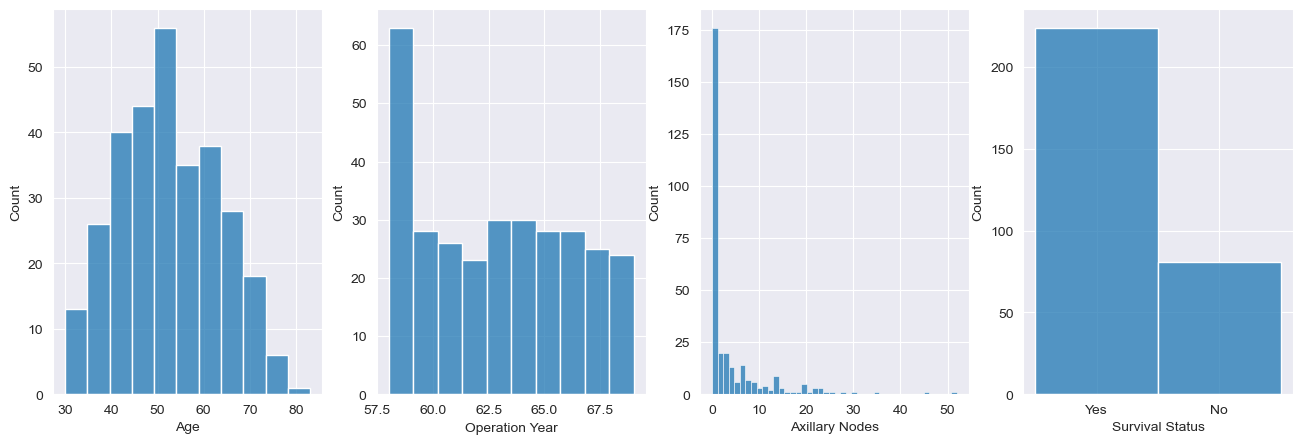

In [17]:
sns.set_style("darkgrid")
columns = haber_df.columns
fig, axes = plt.subplots(1, 4, figsize=(16,5))

for col, ax in zip(columns, axes):
    sns.histplot(data=haber_df[col], stat='count', ax=ax)

Lets do some counting.

### Age 
Most patients are within the ages of 50 and 55. We have very few people that are present over the age of 70 and less than the age of 35. 75% of our patients are below the age of 61 and on average , our patients are 52 years of age.

### Operation Year 
Most patients were operated on 1957, after this year, between 20 and 30 patients were being operated per year.

### Survival Status 
Most students actually 5 years or longer after the operation while less than 95 patients did not survive. Over 250 survived after the operation for 5 years or longer, over 80 did not.

### Axillary Nodes
 Most patients had around 4 nodes or less. Over 175 had a single node. 


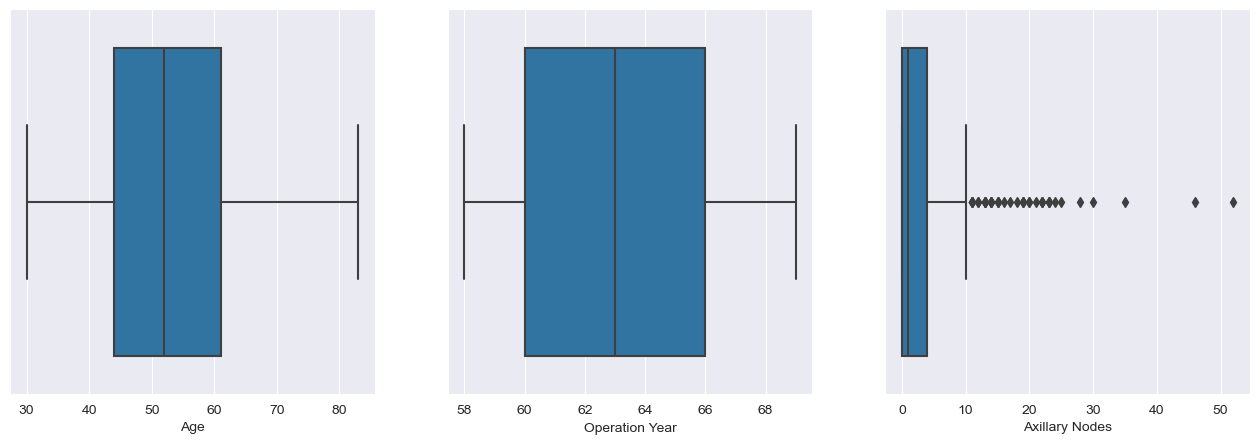

In [18]:
columns = haber_df.columns[:-1]
fig, axes = plt.subplots(1, 3, figsize=(16,5))

for col, ax in zip(columns, axes):
    sns.boxplot(x=haber_df[col], ax=ax)

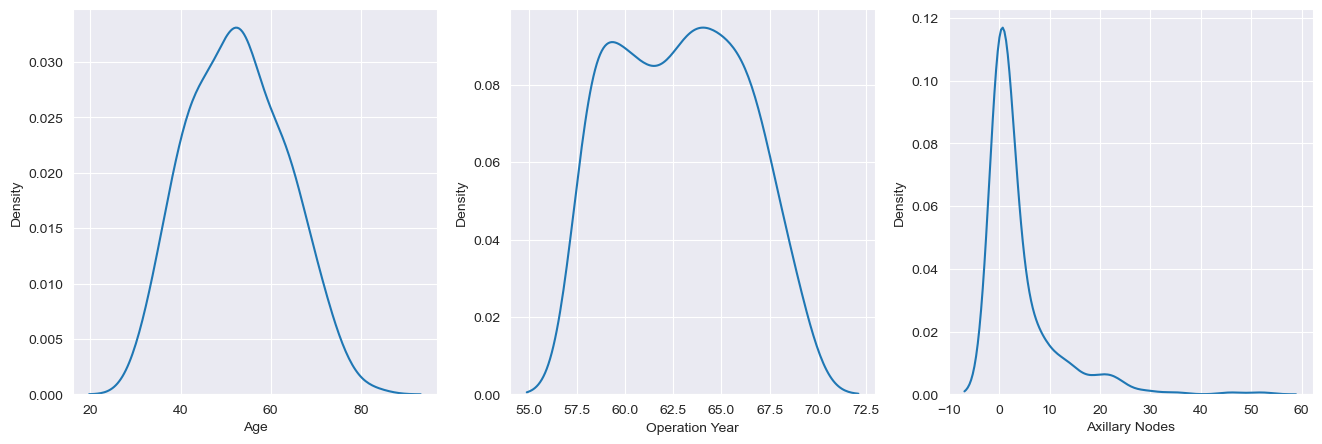

In [19]:
sns.set_style("darkgrid")
columns = haber_df.columns[:-1]
fig, axes = plt.subplots(1,3,figsize=(16,5))

for col, ax in zip(columns, axes):
    sns.kdeplot(data=haber_df[col], ax=ax)

# Bivariate Anaylsis

In [11]:
# make a new dataframe for ease of visualisation

df_survival = pd.get_dummies(haber_df["Survival Status"])
new_haber_df = pd.concat([haber_df, df_survival], axis=1)

new_haber_df.head()

,Age,Operation Year,Axillary Nodes,Survival Status,No,Yes
0,30,62,3,Yes,0,1
1,30,65,0,Yes,0,1
2,31,59,2,Yes,0,1
3,31,65,4,Yes,0,1
4,33,58,10,Yes,0,1


In [12]:
new_haber_df.drop("No",axis=1,inplace=True)

new_haber_df = new_haber_df.rename(columns = {
    "Yes":"Survival Status Num_Representation"
})

new_haber_df.head()

,Age,Operation Year,Axillary Nodes,Survival Status,Survival Status Num_Representation
0,30,62,3,Yes,1
1,30,65,0,Yes,1
2,31,59,2,Yes,1
3,31,65,4,Yes,1
4,33,58,10,Yes,1


Earlier on, we changed survival status from a numerical datatype to categorical data type so that we can easily understand what it represent instead of just having numbers. The code above converts this feature back to numerical data. This is because some of the visualisations are easy to plot with numerical data. 

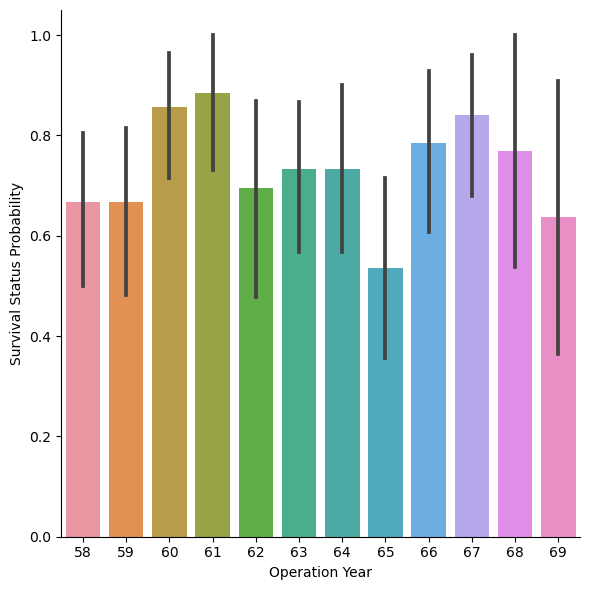

In [13]:
facet = sns.catplot(x = "Operation Year", y = "Survival Status Num_Representation", data=new_haber_df, kind = "bar", height = 6)
facet.set_ylabels("Survival Status Probability");

Patients operated in 1965, appear to have less chance of survival, whereas patients operated after and before this year have a reasonable higher change of survival(Above 0.5 probability). While patients operated in 1961 have a higher probablity of survival. 
 
We can be 95% confindent that patients operated on 1961 have over 75% chance of survival.

Text(0, 0.5, 'Counts')

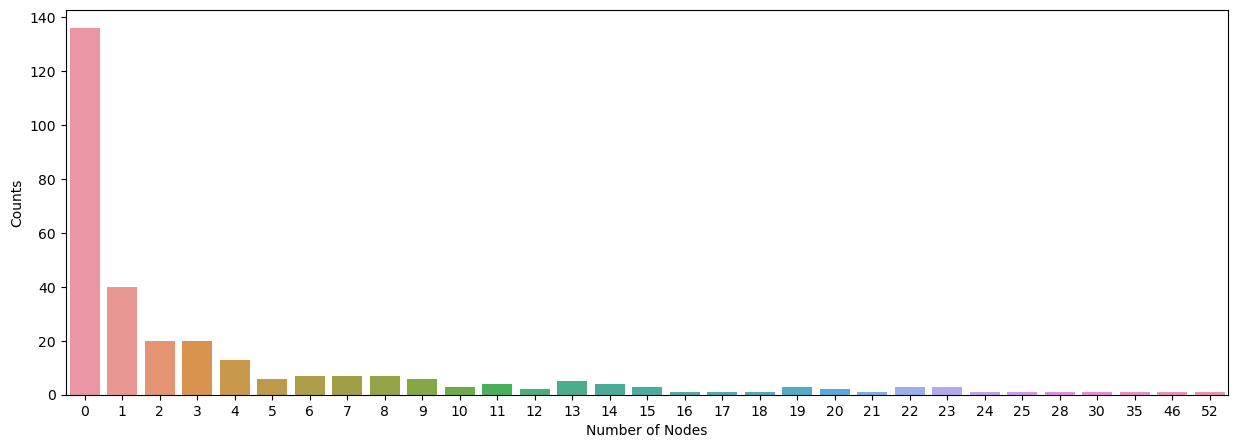

In [14]:
x_ = new_haber_df["Axillary Nodes"].value_counts()
plt.figure(figsize=(15,5))
sns.barplot(x=x_.index,y=x_.values);

plt.xlabel("Number of Nodes")
plt.ylabel("Counts")

Before we can perform a factor plot on the Auxillary nodes, lets understand the frequency of the number of nodes. From this bar plot above, we understand that most patients had 0 positive nodes.

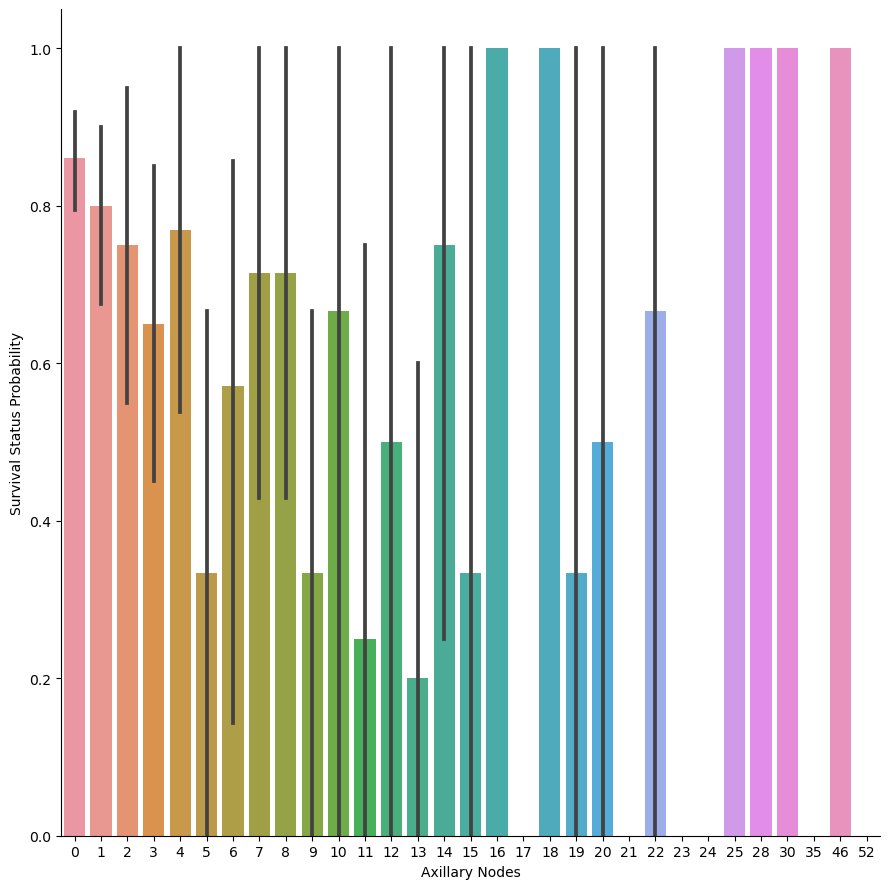

In [15]:
facet = sns.catplot(x = "Axillary Nodes", y = "Survival Status Num_Representation", data=new_haber_df, kind = "bar", height = 9
                   )
facet.set_ylabels("Survival Status Probability");

Based on my research, a positive lymp node is a  lymph node in the area of the armpit (axilla) to which cancer has spread. A negative lymph node is a lymph node free of cancer cells.


The x-axis in the above graph represents the number of positive nodes found and the y-axis represents the probability that the patients will either survive or die in 5 years based on the positive nodes detected. Patients with 0 positive nodes have an 80% percentage chance of survival. Generally,  75% of the patients have 4 positive nodes.

Using the confidence interval represented through the black lines, you can be 95% confident that most patients from the large population with 0 positive nodes have between 80% and 90% chance of survival.

The probabilities above are most affected by the data we have. For instance, for people with positive of nodes 16,17, 25,28, 30 and 46 have a high survival rate, only because for each of those those nodes those a single patient and that patient survived. There are high chances that if more patients were recorded, these patients might have a lower chance of survival.

<Figure size 2000x300 with 0 Axes>

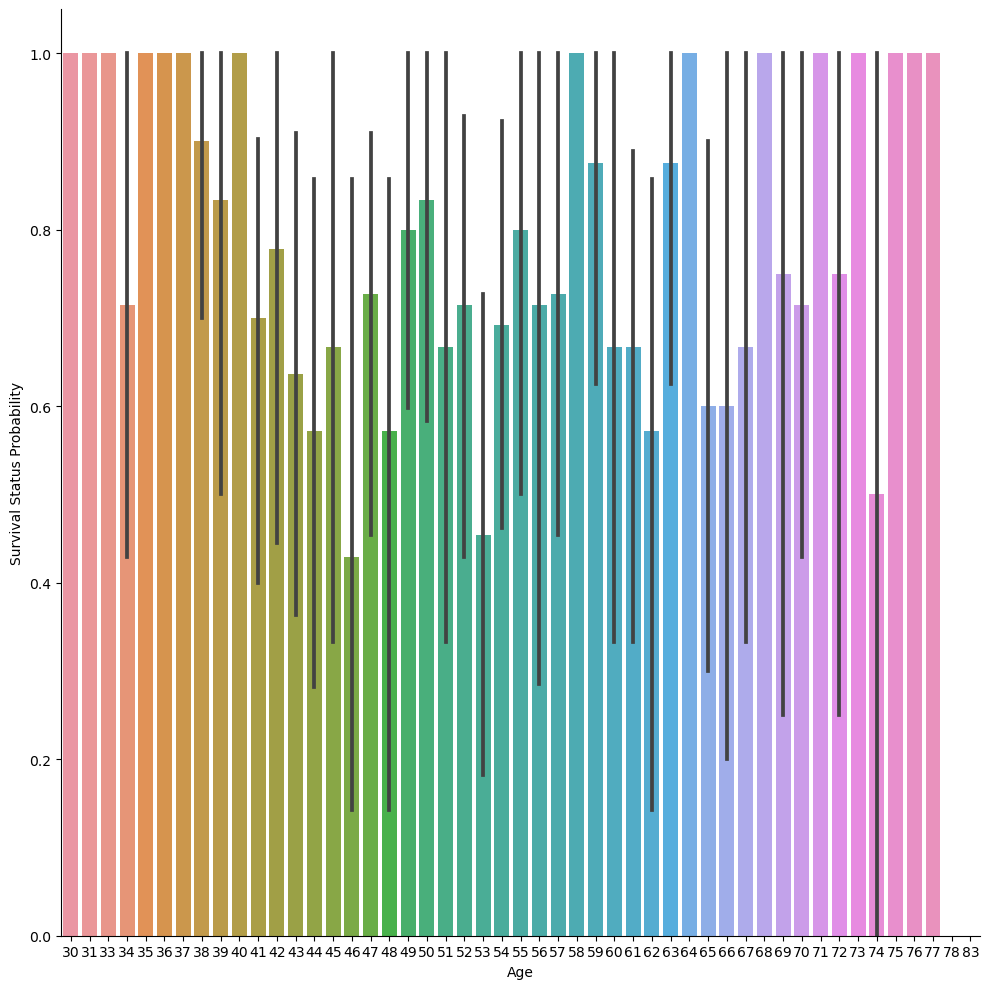

In [16]:
plt.figure(figsize=(20,3))
facet = sns.catplot(x = "Age", y = "Survival Status Num_Representation", data=new_haber_df, kind = "bar", height = 10)
facet.set_ylabels("Survival Status Probability");


From the sample of data that we have patients with 37 years of age have a higher chance of survival. We can be 95% confident that patients with 37 years old have between have over 75% chance of survival. Patients of 46 of age have a lowe chance of survival from this sample of data. 

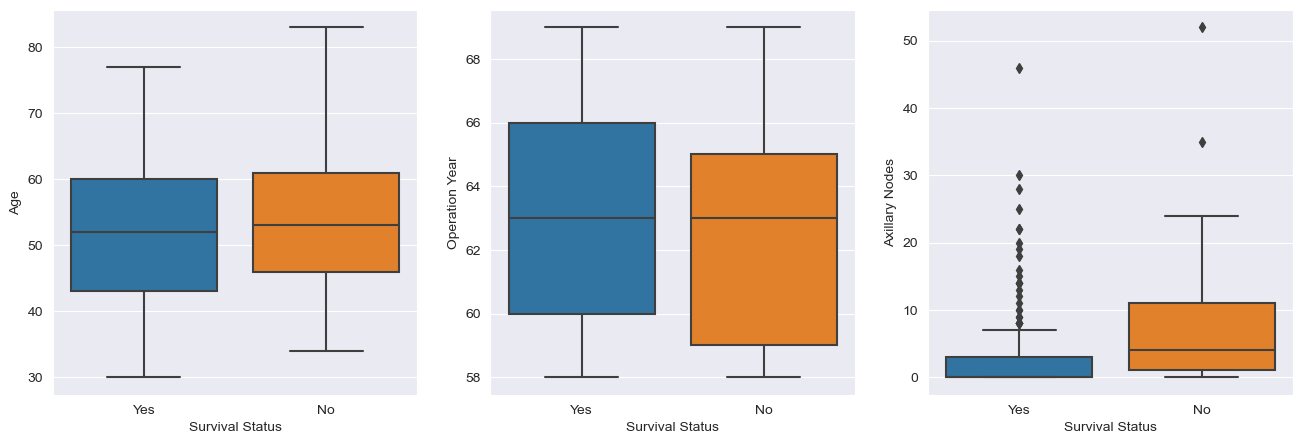

In [20]:
columns = haber_df.columns[:-1]
fig, axes = plt.subplots(1, 3, figsize=(16,5))

for col, ax in zip(columns, axes):
    sns.boxplot(x= haber_df["Survival Status"],y=haber_df[col], ax=ax)

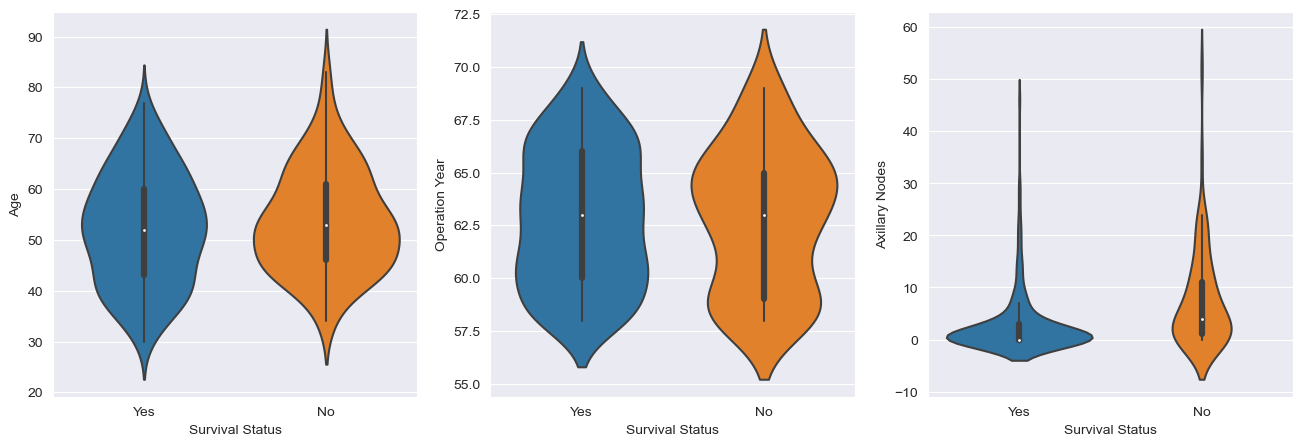

In [21]:

columns = haber_df.columns[:-1]
fig, axes = plt.subplots(1, 3, figsize=(16,5))

for col, ax in zip(columns, axes):
    sns.violinplot(x= haber_df["Survival Status"],y=haber_df[col], ax=ax)

In [25]:

haber_df.describe()


,Age,Operation Year,Axillary Nodes
count,305.000000,305.000000,305.000000
mean,52.531148,62.849180,4.036066
std,10.744024,3.254078,7.199370
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,61.000000,66.000000,4.000000
max,83.000000,69.000000,52.000000


In this section,we will focus on the boxplot and the violin plot to extract some insights.

75 % of the people who survived were less than 61 years of age. While 75 % of those who died were less than 62 years of age.
The average of those survived was 52 years. Its almost the same with those who did not surive, 55 years was the average.F

75% of those who survived were operated in 1966. Most people who survived were operated in 1963. 

Most patients had around 4 lymph nodes. 75% of those patients to be more specific had less than 4 nodes. 



###  Probability Distirubtion Function and Cumulative Distribution Function

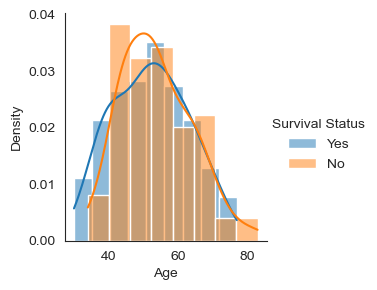

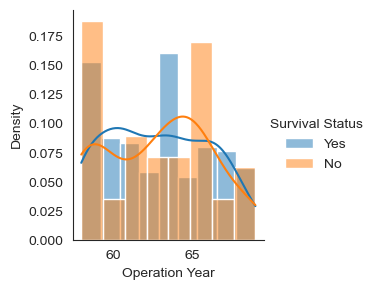

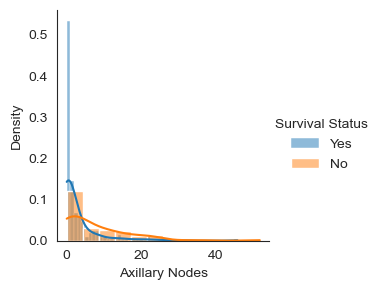

In [22]:
sns.set_style("white")
columns = haber_df.columns[:-1] 

for col in columns:
    facet = sns.FacetGrid(haber_df,hue="Survival Status")
    facet.map(sns.histplot,
          col,
          kde=True,
          stat='density').add_legend();




Age

Bin Edges: [30.  35.3 40.6 45.9 51.2 56.5 61.8 67.1 72.4 77.7 83. ]

PDF: [0.04918033 0.08852459 0.15081967 0.17377049 0.18032787 0.13442623
 0.13442623 0.05901639 0.02295082 0.00655738]

CDF: [0.04918033 0.13770492 0.28852459 0.46229508 0.64262295 0.77704918
 0.91147541 0.9704918  0.99344262 1.        ]


Operation Year

Bin Edges: [58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]

PDF: [0.20655738 0.09180328 0.0852459  0.07540984 0.09836066 0.09836066
 0.09180328 0.09180328 0.08196721 0.07868852]

CDF: [0.20655738 0.29836066 0.38360656 0.45901639 0.55737705 0.6557377
 0.74754098 0.83934426 0.92131148 1.        ]


Axillary Nodes

Bin Edges: [ 0.   5.2 10.4 15.6 20.8 26.  31.2 36.4 41.6 46.8 52. ]

PDF: [0.7704918  0.09836066 0.05901639 0.02622951 0.0295082  0.00655738
 0.00327869 0.         0.00327869 0.00327869]

CDF: [0.7704918  0.86885246 0.92786885 0.95409836 0.98360656 0.99016393
 0.99344262 0.99344262 0.99672131 1.        ]



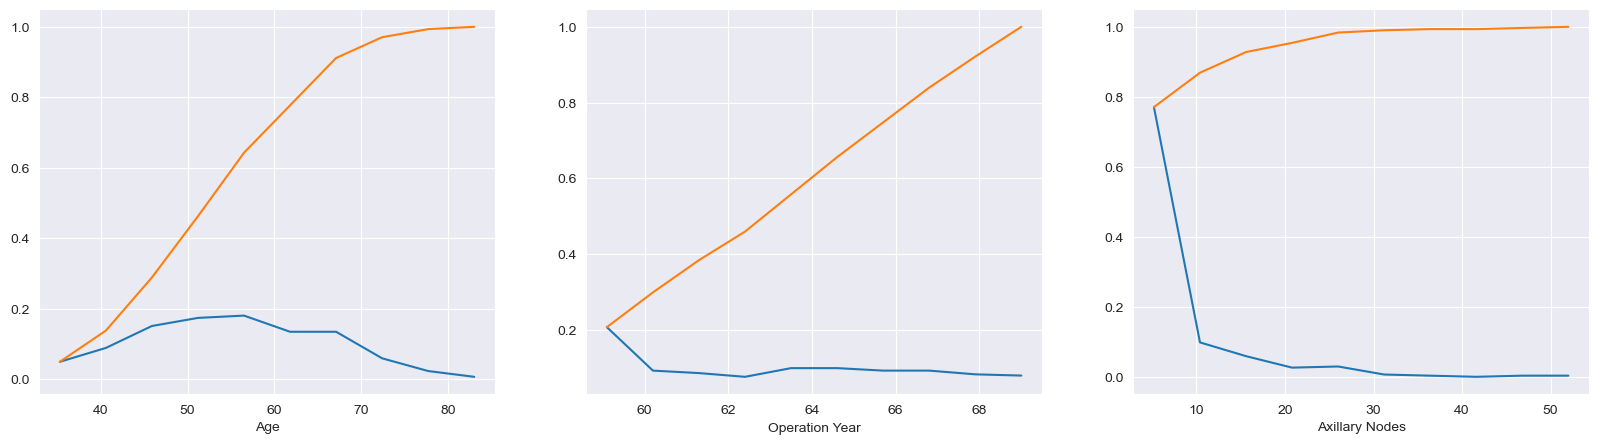

In [23]:

sns.set_style("darkgrid")
plt.figure(figsize=(20,5))
for index,col in enumerate(columns):
    plt.subplot(1, 3,index+1)
    print(f'\n{col}\n')
    counts, bin_edges = np.histogram(haber_df[col], bins=10, density=True)
    print(f"Bin Edges: {bin_edges}\n")
    pdf = counts/sum(counts)
    print(f"PDF: {pdf}\n")
    cdf = np.cumsum(pdf)
    print(f"CDF: {cdf}\n")
    plt.plot(bin_edges[1:], pdf, bin_edges[1:], cdf);
    plt.xlabel(col)

# Multivariate Anaylsis

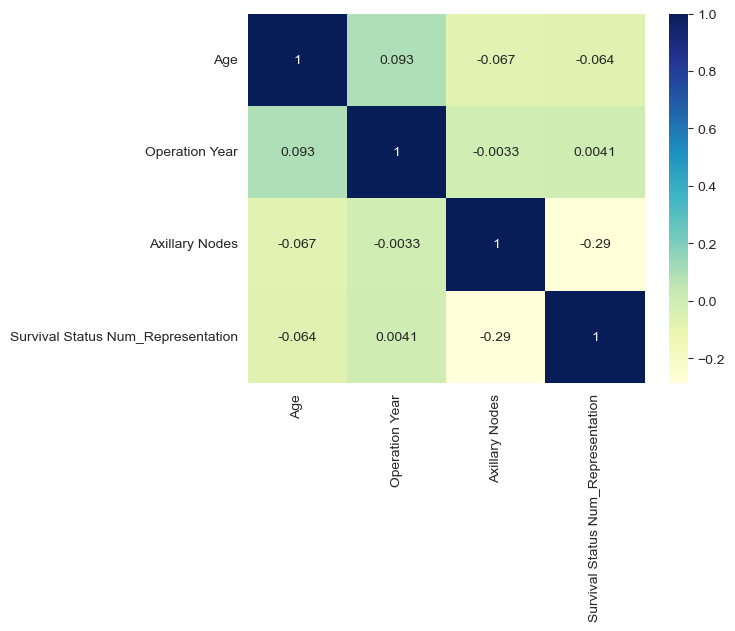

In [24]:
sns.heatmap(new_haber_df.corr(),cmap="YlGnBu",annot=True);


Operation year and age have the strongest correlation.

From the features we have Survival status correlates the most with operation year.

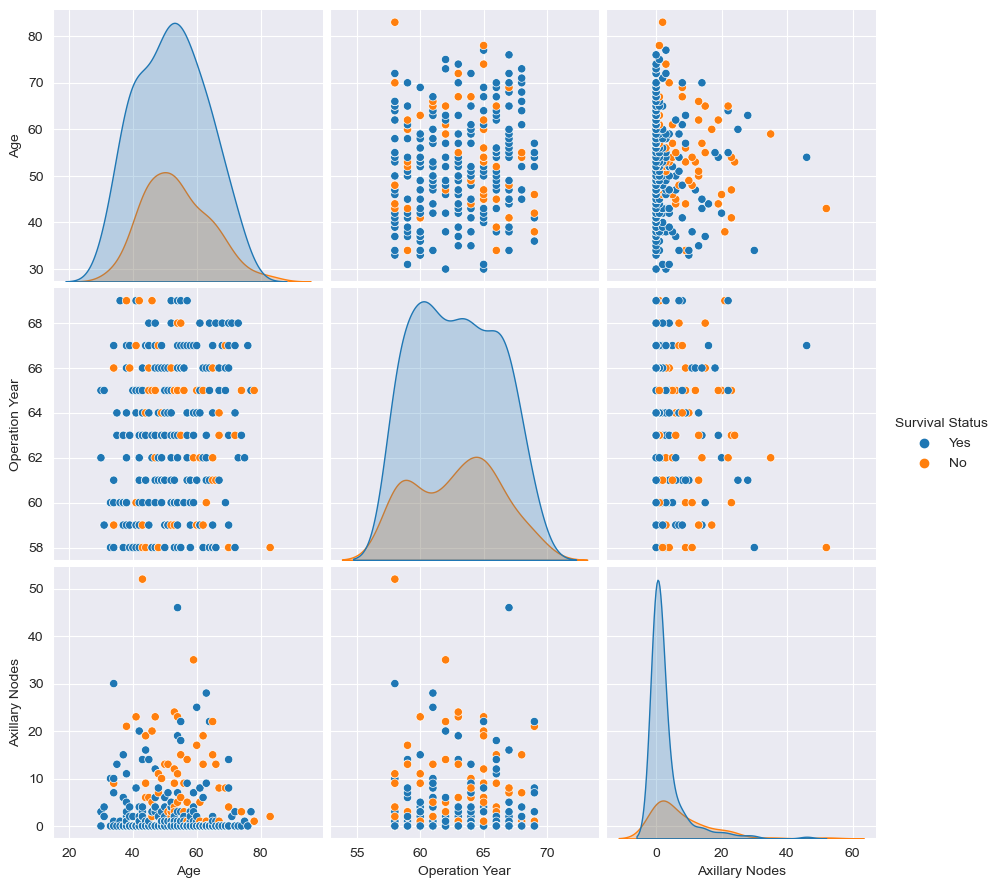

In [29]:
sns.pairplot(haber_df, hue = "Survival Status", vars = ["Age", "Operation Year", "Axillary Nodes"], height = 3);

There is no much of correlation between features.